<h1>Inhalt<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aufgaben" data-toc-modified-id="Aufgaben-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aufgaben</a></span></li><li><span><a href="#Voraussetzungen" data-toc-modified-id="Voraussetzungen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Voraussetzungen</a></span></li><li><span><a href="#Targetfunktion-$t(x)$" data-toc-modified-id="Targetfunktion-$t(x)$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Targetfunktion $t(x)$</a></span><ul class="toc-item"><li><span><a href="#Beispiele-rausnehmen" data-toc-modified-id="Beispiele-rausnehmen-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Beispiele rausnehmen</a></span></li></ul></li><li><span><a href="#Calculate-hypothesis" data-toc-modified-id="Calculate-hypothesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate hypothesis</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-$H_0:-h-=-\theta$" data-toc-modified-id="Hypothesis-$H_0:-h-=-\theta$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Hypothesis $H_0: h = \theta$</a></span><ul class="toc-item"><li><span><a href="#All-hypothesis" data-toc-modified-id="All-hypothesis-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>All hypothesis</a></span></li><li><span><a href="#Average-hypothesis" data-toc-modified-id="Average-hypothesis-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Average hypothesis</a></span></li></ul></li><li><span><a href="#Hypothesis-$H_1:-h-=-\theta_0-+-\theta_1-x$" data-toc-modified-id="Hypothesis-$H_1:-h-=-\theta_0-+-\theta_1-x$-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hypothesis $H_1: h = \theta_0 + \theta_1 x$</a></span></li></ul></li></ul></div>

# Aufgaben 

Implementieren Sie die Simulation zur Berechung des Bias-Variance für zwei Datenpunkte:

- $p(x)$ ist gleichverteilt im Intervall $[0, 2*pi]$
- unbekannte Targetfunktion ist $sin(x)$ kein Rauschen
- Erzeugen Sie z.B. 10000 verschiedene Trainingsdaten mit jeweils zwei Beispielen
- Bestimmen Sie die gefundenen Hypothesen für die beiden Hypothesenmengen (für die einzelnen Trainingsdaten):
- Hypothesenmenge $H_0: h = \theta_0$
- Hypothesenmenge $H_1: h = \theta_0 + \theta_1 * x$
- Berechnen Sie hieraus E_out für $H_0$ und $H_1$
- Bestimmen Sie die durchschnittliche Hypothese für $H_0$ und $H_1$.

- Bestimmen Sie  damit den Bias und die Variance.
- Erzeugen Sie die Plots  und die Ausgaben wie in http://christianherta.de/lehre/dataScience/machineLearning/basics/bias-variance-tradeoff.html

# Voraussetzungen 
Lecture: [Bias-Variance Tradeof lecture by abu](https://www.youtube.com/watch?v=zrEyxfl2-a8&hd=1)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Targetfunktion $t(x)$

$$
t: [0,2\pi] \rightarrow R \; with \; t(x) = sin(x)
$$

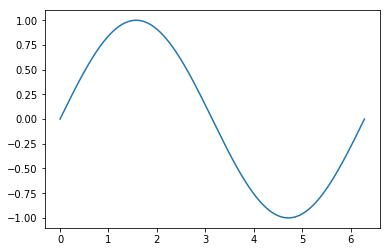

In [2]:
x = np.linspace(0, 2 * np.pi, 10000)
y = np.sin(x)

plt.plot(x, y)

## Beispiele rausnehmen

In [3]:
X = np.random.uniform(0, 2*np.pi, (2, 10000))
Y = np.sin(X)
print('X:', X, ' and shape:', X.shape)
print('Y:', Y, ' and shape:', Y.shape)

X: [[ 0.67502202  5.79719988  5.83923814 ...,  1.93428379  2.98767824
   3.51725616]
 [ 5.52530487  2.60932524  5.30404786 ...,  0.23582315  1.37716382
   3.59375374]]  and shape: (2, 10000)
Y: [[ 0.6249145  -0.46707992 -0.42950735 ...,  0.93466259  0.15330743
  -0.36688984]
 [-0.68738357  0.50748838 -0.8300166  ...,  0.23364343  0.98131173
  -0.43691047]]  and shape: (2, 10000)


# Calculate hypothesis

## Hypothesis $H_0: h = \theta$

In [13]:
def hypothese_0(theta):
    return lambda x: np.ones_like(x) * theta

### All hypothesis
$$
\theta = \frac{\Delta y}{\Delta x} = \frac{y_0 - y_1}{x_0 - x_1}
$$

In [14]:
def calculate_all_theta(x, y):
    deltay = x[0] - x[1]
    deltax = y[0] - y[1]
    theta = deltay / deltax
    return theta


thetas = calculate_all_theta(X, Y)

In [ ]:
for theta in thetas:
    plt.plot(x, hypothese_0(theta)(x))
plt.show()

KeyboardInterrupt: 

### Average hypothesis

## Hypothesis $H_1: h = \theta_0 + \theta_1 x$

In [6]:
def hypothese_1(x):
    return lambda theta0, theta1: theta0 + theta1 * x

$$
\tilde { h ( \mathbf { x } ) } = \mathbb { E } _ { \mathcal { D } } \left[ h ^ { \mathcal { D } } ( \mathbf { x } ) \right] \approx \frac { 1 } { K } \sum _ { k = 1 } ^ { K } h ^ { \left( D _ { k } \right) } ( \mathrm { x } )
$$

$$
\tilde { h ( \mathbf { x } ) }_0 = \frac { 1 } { K } \sum _ { k = 1 } ^ { K } h_0 ( \mathrm { x } ) = \frac { 1 } { K } \sum _ { k = 1 } ^ { K } \theta 
$$

$$
\tilde { h ( \mathbf { x } ) }_1 = \frac { 1 } { K } \sum _ { k = 1 } ^ { K } h_1 ( \mathrm { x } ) = \frac { 1 } { K } \sum _ { k = 1 } ^ { K } \theta_0 + \theta_1 * x
$$